In [1]:
import pandas as pd
from IPython.display import display

from wyvern.analysis.parameters import PayloadSizingParameters
from wyvern.analysis.payload_sweep import sweep_payload_configs
from wyvern.data import ALL_COMPONENTS, RASSAM_CORRELATIONS
from wyvern.performance.models import QuadraticLDModel
from wyvern.sizing import aerostructural_mass_ratio, total_component_mass

ld_model = QuadraticLDModel(c_d0=0.0318, e_inviscid=0.95, K=0.45, aspect_ratio=5.1)

# calculate aerostructural mass ratio and fixed component masses first
total_fixed_mass = total_component_mass(ALL_COMPONENTS)
as_m_ratio = aerostructural_mass_ratio(RASSAM_CORRELATIONS, total_fixed_mass)

params = PayloadSizingParameters(
    as_mass_ratio=as_m_ratio,
    total_fixed_mass=total_fixed_mass,
    aero_model=ld_model,
    cruise_speed=10,
    turn_speed=10,
    planform_area=0.566,
    propulsive_efficiency=0.5,
    configuration_bonus=1.3,
    short_takeoff=True,
    stability_distance=0,
)

payload_configs = [(8, i, 4) for i in range(0, 7)]
results = sweep_payload_configs(payload_configs, params)

with pd.option_context("display.precision", 3):
    display(results)

# export to csv
results.to_csv("payload_sweep.csv")

,num_ping_pong_balls,num_golf_balls,num_tennis_balls,payload_mass,empty_mass,as_mass,takeoff_mass,cargo_units,payload_fraction,reached_pf_cap,...,cl_turn,ld_turn,total_energy,cargo_pts_score,pf_score,efficiency_score,takeoff_bonus,configuration_bonus,stability_bonus,total_flight_score
804,8,0,4,259.2,1033.06,584.91,1292.26,480,0.201,False,...,0.41,9.064,2806.6,75.313,0.201,1.3,1.25,1.3,1.0,31.911
814,8,1,4,305.13,1071.04,622.89,1376.17,530,0.222,False,...,0.437,9.282,2901.284,80.722,0.222,1.217,1.25,1.3,1.0,35.382
824,8,2,4,351.06,1109.019,660.869,1460.079,580,0.24,False,...,0.464,9.462,3001.924,85.98,0.24,1.136,1.25,1.3,1.0,38.173
834,8,3,4,396.99,1146.999,698.849,1543.989,630,0.257,True,...,0.49,9.607,3108.519,91.104,0.25,1.06,1.25,1.3,1.0,39.222
844,8,4,4,442.92,1184.979,736.829,1627.899,680,0.272,True,...,0.517,9.72,3221.068,96.107,0.25,0.987,1.25,1.3,1.0,38.535
854,8,5,4,488.85,1222.958,774.808,1711.808,730,0.286,True,...,0.544,9.805,3339.572,101.001,0.25,0.918,1.25,1.3,1.0,37.674
864,8,6,4,534.78,1260.938,812.788,1795.718,780,0.298,True,...,0.57,9.863,3464.031,105.795,0.25,0.853,1.25,1.3,1.0,36.677


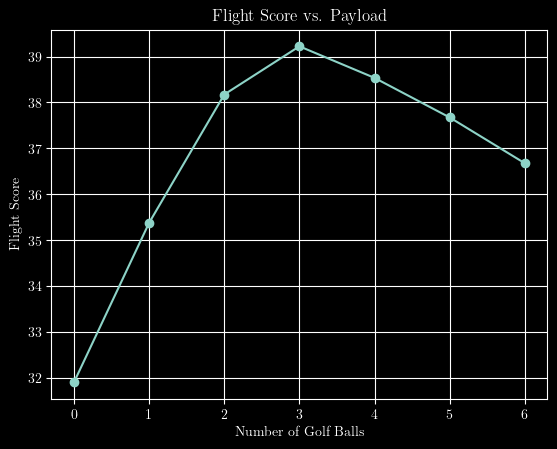

In [3]:
# plot flight score versus payload

import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('dark_background')

rcParams["text.usetex"] = True
# use computer modern serif font for all text
rcParams["font.family"] = "serif"

fig, ax = plt.subplots()
ax.plot(results["num_golf_balls"], results["total_flight_score"], marker="o")
ax.set_xlabel("Number of Golf Balls")
ax.set_ylabel("Flight Score")
ax.grid()
ax.title.set_text("Flight Score vs. Payload")

# save the figure
fig.savefig("flight_score_vs_payload.png", dpi=300, bbox_inches="tight", transparent=True)